<a href="https://colab.research.google.com/github/NadiaLayraAziza/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np
# img_f = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
# img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
# plt.imshow(img_rgb)

**TUGAS PRAKTIKUM**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


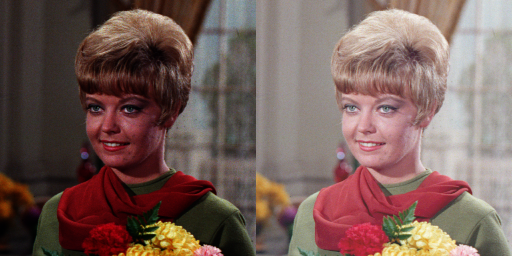

In [5]:
# Tugas 1 : Buat Gamma Correction

print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img_gamma = np.zeros(original.shape, original.dtype)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Gamma Correction
     img_gamma[y,x,c] = np.clip(255 * ((original[y,x,c] / 255)**(1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, img_gamma))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------------------
masukkan nilai bit-depth [1-7]: 2


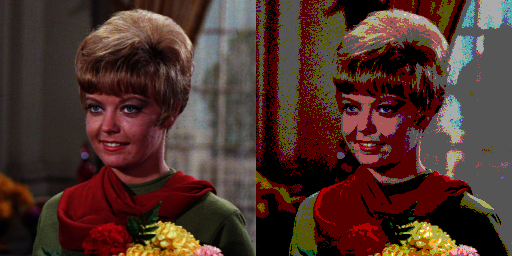

In [15]:
# Tugas 2 : Buat Simulasi Image Depth 

print(' Simulasi Image Depth ')
print('----------------------------------')
try:
  depth = float(input('masukkan nilai bit-depth [1-7]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img_depth = np.zeros(original.shape, original.dtype)

# Rumus menentukan level kedalaman
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Bit Depth
      img_depth[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255)

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.53403691633775 dB


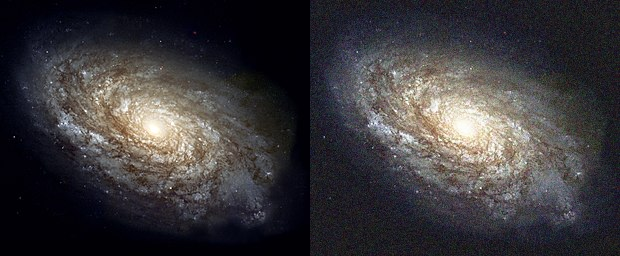

In [19]:
# Tugas 3 : Buat modul Average Denoising
# 3.1 = Jumlah Citra 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[4]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.527308990541467 dB


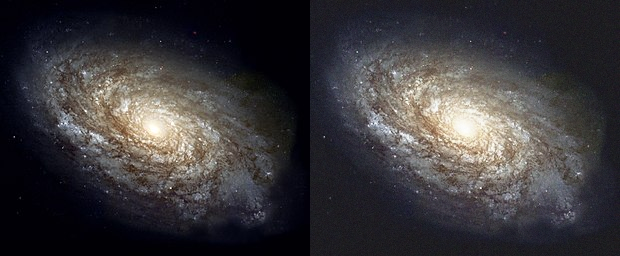

In [20]:
# 3.2 = Jumlah Citra 30

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[29]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(29):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 60
Nilai PSNR = 27.485991772042095 dB


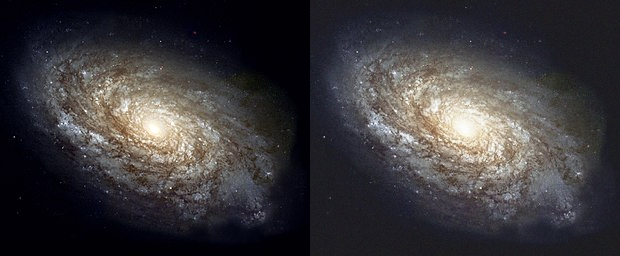

In [21]:
# 3.3 = Jumlah Citra 60

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[59]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(59):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 60')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 80
Nilai PSNR = 27.50405678468907 dB


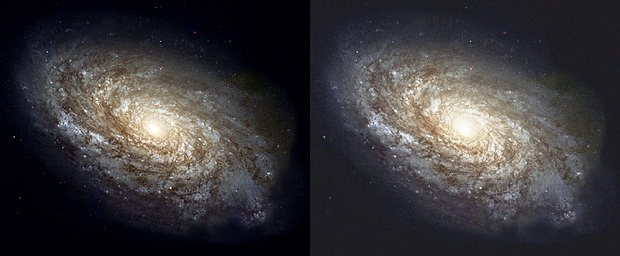

In [22]:
# 3.4 = Jumlah Citra 80

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[79]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 80')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 100
Nilai PSNR = 27.508243512084817 dB


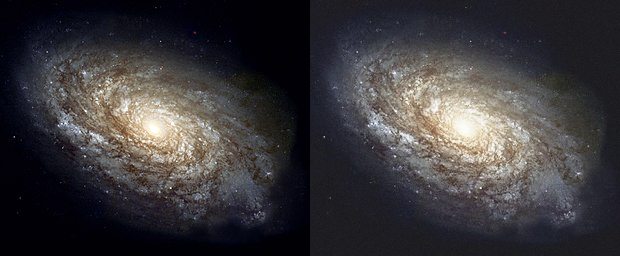

In [24]:
# 3.5 = Jumlah Citra 100

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[99]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 100')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

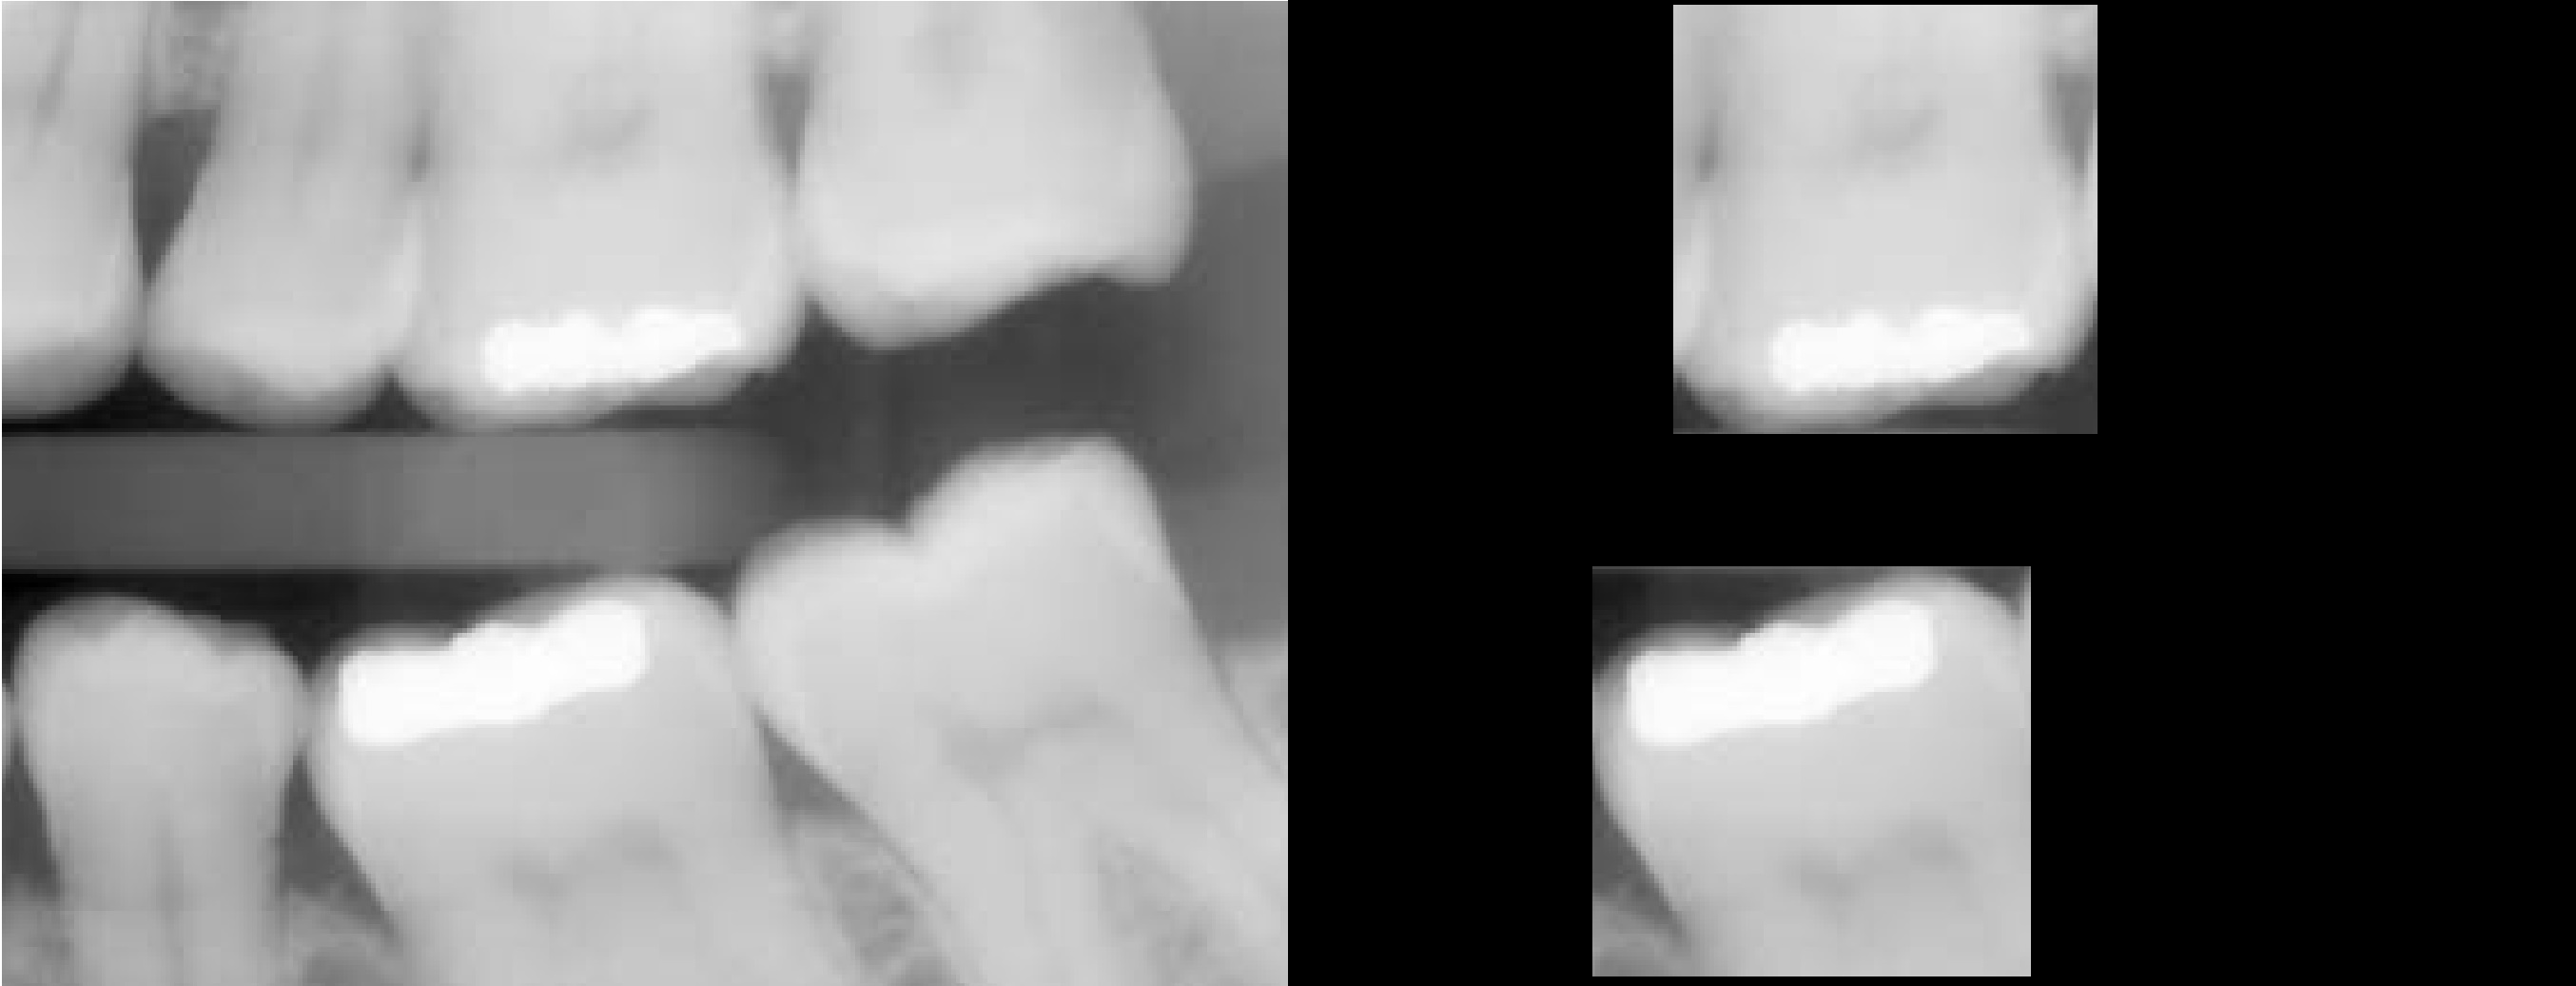

In [27]:
# Tugas 4 : Buat image masking 

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
teeth_mask = np.zeros(original.shape, dtype = np.uint8)

teeth_mask = cv.rectangle(teeth_mask, pt1 = (320, 595), pt2 = (780, 1025), color=(255,255,255), thickness =-1)
result = original & teeth_mask

teeth_mask1 = cv.rectangle(teeth_mask, pt1 = (405, 5), pt2 = (850, 455), color=(255,255,255), thickness =-1)
result = original & teeth_mask1

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

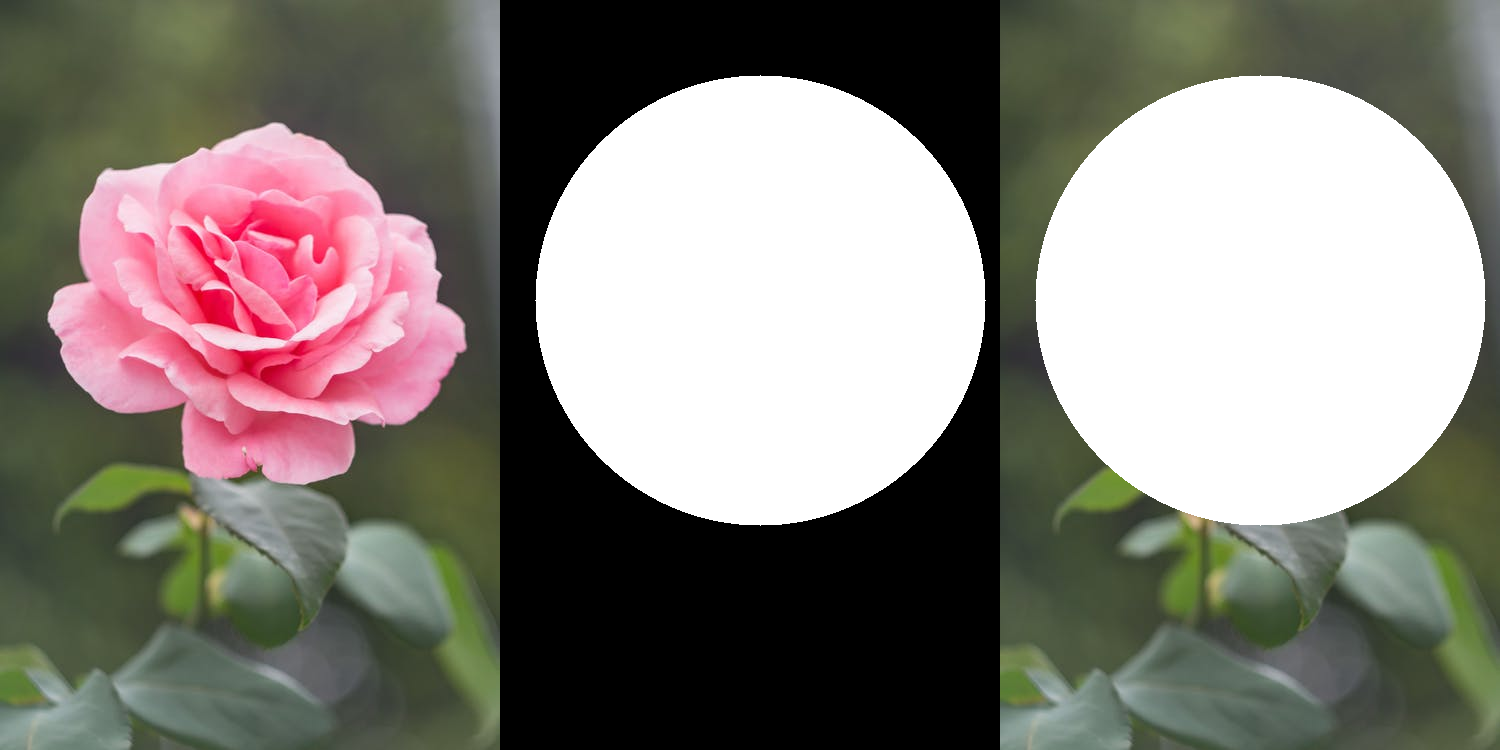

In [28]:
# Tugas 5 : Percobaan menggunakan operator lain (Image Masking)
# 5.1 = OR

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')

mask_or = np.zeros(original.shape, dtype=np.uint8)
mask_or = cv.circle(mask_or, (260, 300), 225, (255,255,255), -1)

masked_output = original | mask_or

final_frame = cv.hconcat((original, mask_or, masked_output))
cv2_imshow(final_frame)

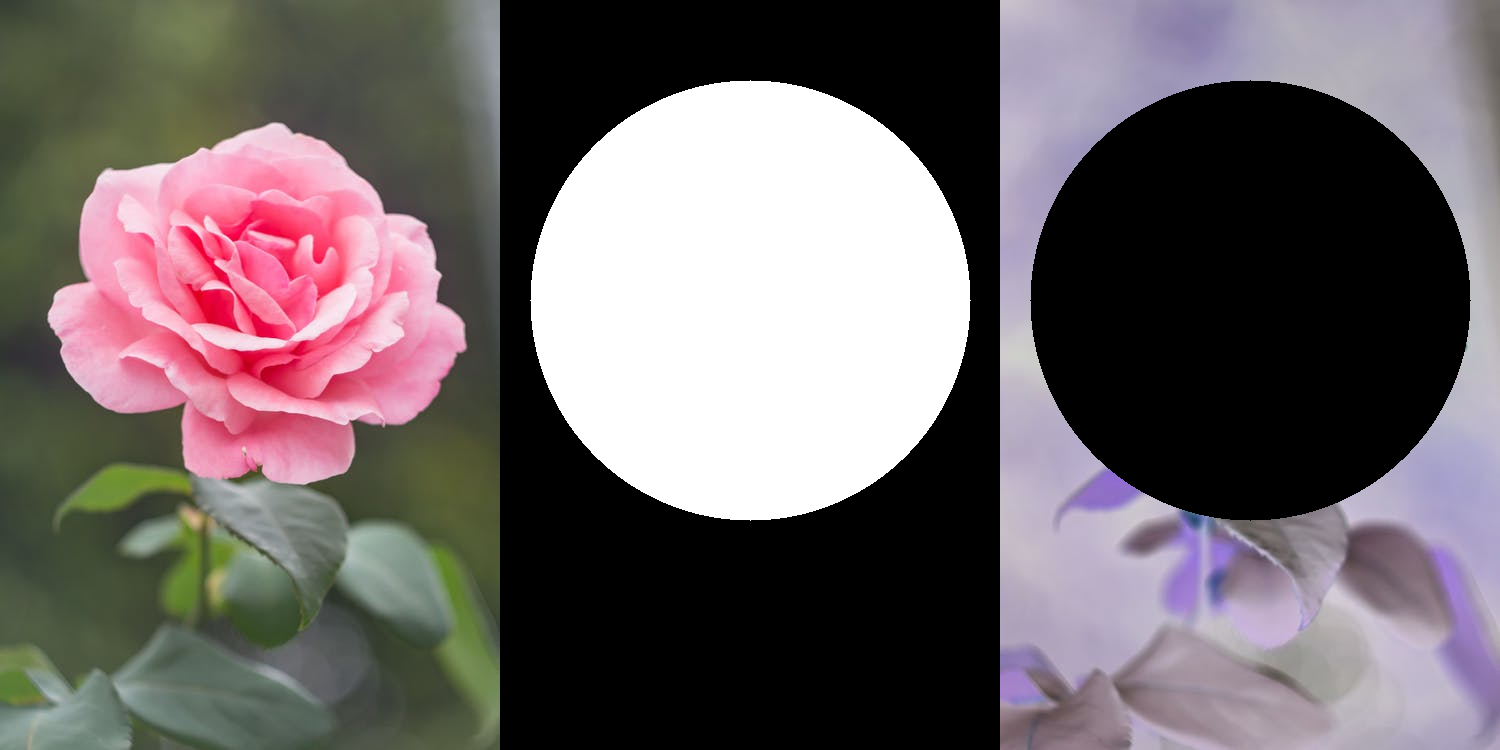

In [29]:
# 5.2 = NOT

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')

mask_not = np.zeros(original.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = ~original & ~mask_not

final_frame = cv.hconcat((original, mask_not, masked_output))
cv2_imshow(final_frame)

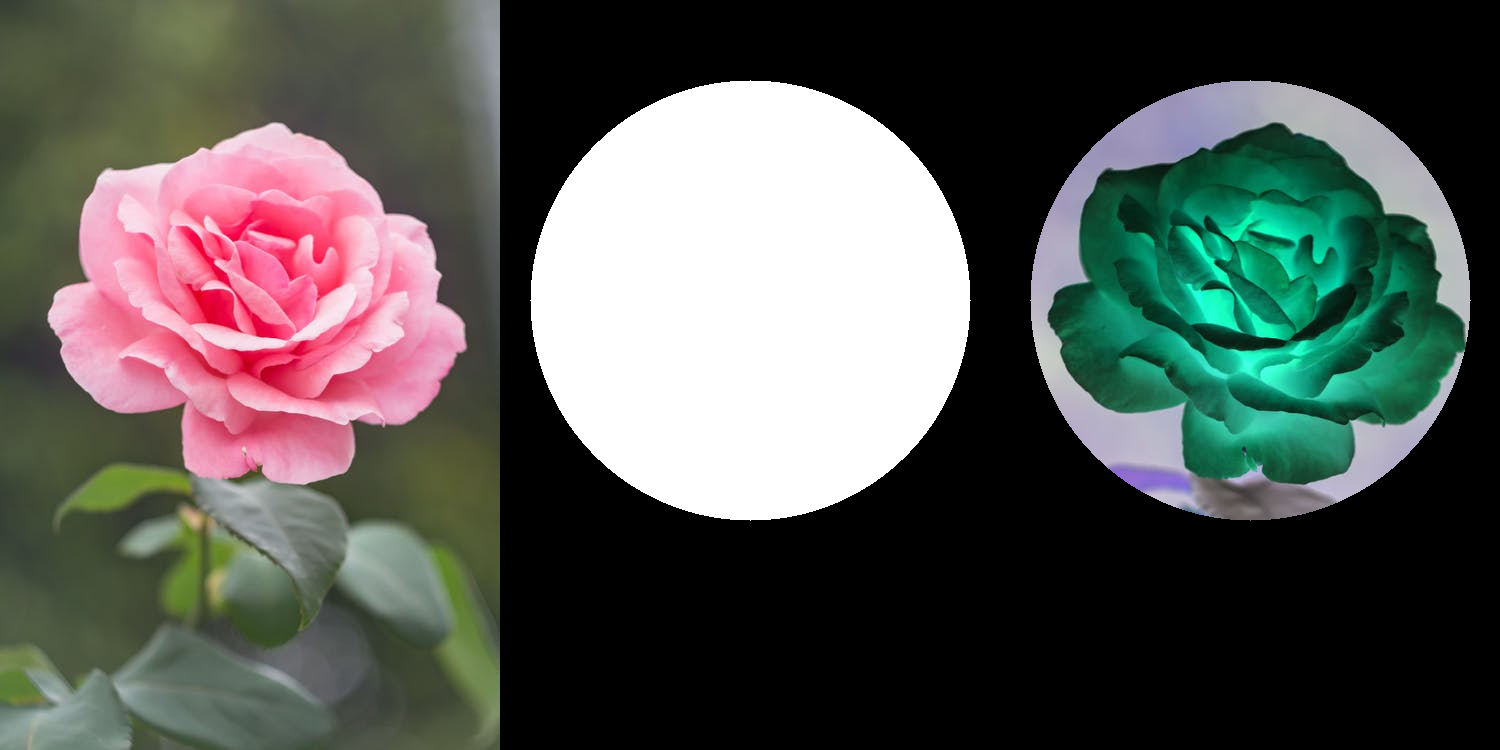

In [30]:
# 5.3 = NAND

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')

mask_nand = np.zeros(original.shape, dtype=np.uint8)
mask_nand = cv.circle(mask_nand, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = ~original & mask_nand

final_frame = cv.hconcat((original, mask_nand, masked_output))
cv2_imshow(final_frame)

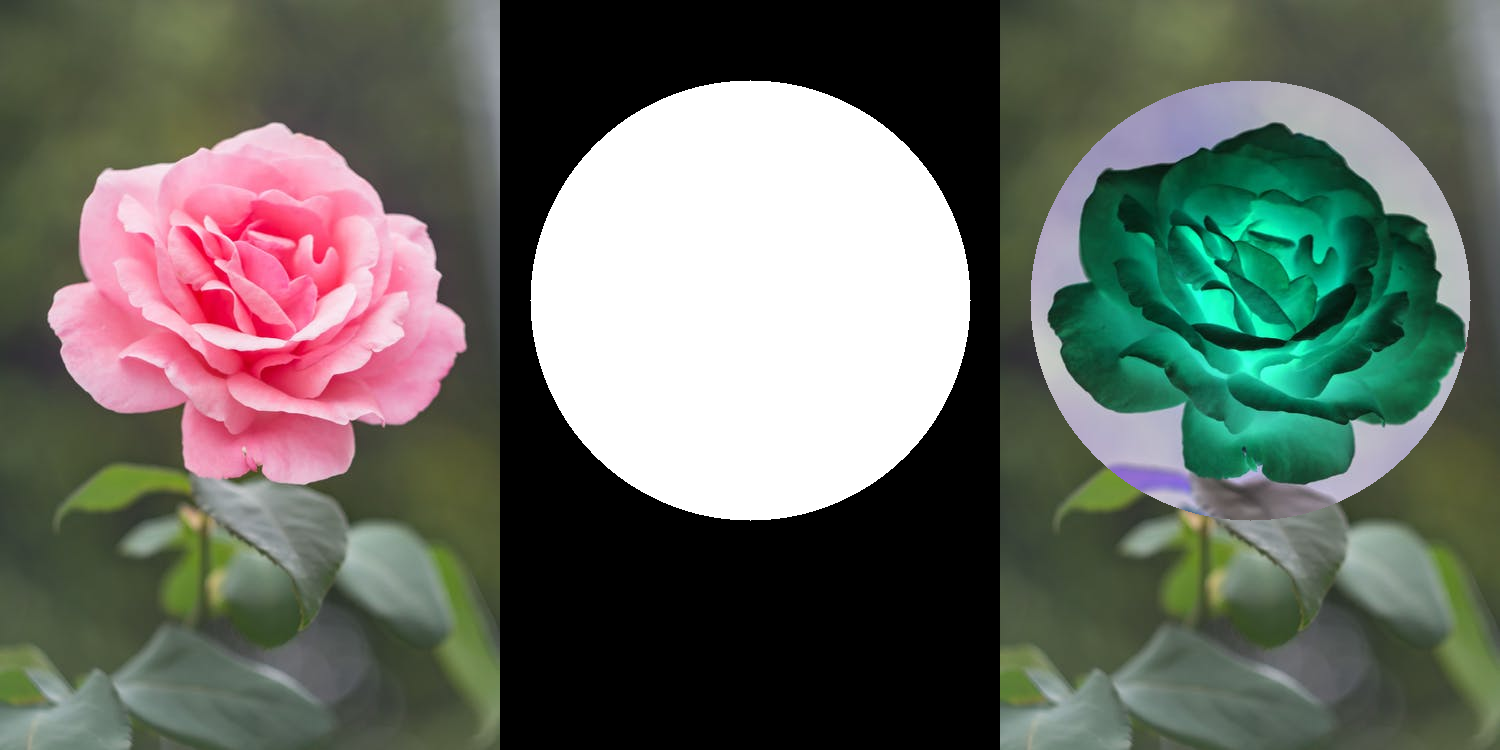

In [31]:
# 5.4 = XOR

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')

mask_xor = np.zeros(original.shape, dtype=np.uint8)
mask_xor = cv.circle(mask_xor, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = original ^ mask_xor

final_frame = cv.hconcat((original, mask_xor, masked_output))
cv2_imshow(final_frame)